In [1]:

# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import string


import sys
# import common_code/PostProcessingScripts which contains default python code used in this jupyter notebook (such as plotting etc.)
sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/common_code/.')
from PostProcessingScripts import * 


/var/folders/h9/clnzhf8d5p9cx1bsz28r5h6w0000gn/T/ipykernel_30468/2852276964.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1 Download and read in the BHNS datafile:


1A. Download the BHNS file that you want from the Publicly available Zenodo: https://zenodo.org/record/5178777 
The example below shows the output for model 'A', which you can obtain by downloading the fiducial.zip file. 


all lines of code that you might have to change are given with "# change this line! " 

In [2]:
# to obtain properties of ALL binaries simulated, do this:

DCOtype = 'BBH'   # You can change this line to 'BBH', 'BHNS' 'BNS', or 'ALL' (All DCOs)  # change this line! (but required downloading BBH/BNS data from Zenodo)


# add path to where the COMPASOutput.h5 file is stored. 
# For you the part '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' is probably different
path = '/Volumes/SimonsFoundation/DataDCO/fiducial/COMPASCompactOutput_'+ DCOtype +'_A.h5' # change this line! 


print('excecuting this code might take a little while (~few min) \n')
fdata = h5.File(path)
# shows the different files within the hdf5 folder 

print('the available datasets for this file are:')
print(fdata.keys())









excecuting this code might take a little while (~few min) 

the available datasets for this file are:
<KeysViewHDF5 ['RLOF', 'commonEnvelopes', 'doubleCompactObjects', 'formationchannel_z_rates', 'redshifts', 'supernovae', 'systems', 'weights_intrinsicFormationPerRedshift', 'weights_intrinsicPerRedshift']>


### M1, M2 and Chirpmass in Msun

The most used parameters are quoted in the file "doubleCompactObjects", that describes many properties of the binaries that form the type of double-compact object (DCO)
merger (here, BHNS) below is an example: 


In [3]:
f_wz = fdata['weights_intrinsicFormationPerRedshift']
# print(f_wz.keys())

xyz = '111'

w_key = 'wform_'+xyz+'_z_0.1923'

weights_z0_2 =  f_wz[w_key][...].squeeze()


fDCO      = fdata['doubleCompactObjects']
M1              = fDCO['M1'][...].squeeze()     # Compact object mass of star 1 in Msun 
print(M1)
print( 'the available metallicities are')
metallicitySystems  = fDCO['Metallicity1'][...].squeeze()  # Metallicity at ZAMS 
print(np.unique(metallicitySystems))



[33.4712  17.0417  14.5644  ...  5.15439  5.54399  5.15051]
the available metallicities are
[0.0001  0.00011 0.00012 0.00014 0.00016 0.00017 0.00019 0.00022 0.00024
 0.00027 0.0003  0.00034 0.00037 0.00042 0.00047 0.00052 0.00058 0.00065
 0.00073 0.00081 0.0009  0.00101 0.00113 0.00126 0.0014  0.00157 0.00175
 0.00195 0.00218 0.00243 0.00272 0.00303 0.00339 0.00378 0.00422 0.00471
 0.00526 0.00587 0.00655 0.00732 0.00817 0.00912 0.01018 0.01137 0.01269
 0.01416 0.01581 0.01765 0.01971 0.0244  0.02705]


In [4]:
def obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/'):
    """
    function that returns the list of redshifts for which the simulations have been run
    
    """
    
    BPSmodelName='A'
    DCOtype='BNS'
    path_ = pathData + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    fdata = h5.File(path, 'r')
    redshifts = fdata['redshifts']['redshift'][...].squeeze()
    fdata.close()
    return redshifts 





def obtain_metallicities_weights(max_z_ind=0):
    redshifts = obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/')
    
    print('we will take systems up to redshift z = ', redshifts[max_z_ind])

    # to obtain properties of ALL binaries simulated, do this:
    DCOtype = 'BBH'   # You can change this line to 'BBH', 'BHNS' 'BNS', or 'ALL' (All DCOs)  # change this line! (but required downloading BBH/BNS data from Zenodo)
    # add path to where the COMPASOutput.h5 file is stored. 
    # For you the part '/Volumes/Andromeda2/DATA/AllDCO_bugfix/' is probably different
    path = '/Volumes/SimonsFoundation/DataDCO/fiducial/COMPASCompactOutput_'+ DCOtype +'_A.h5' # change this line! 
    fdata = h5.File(path)
    fDCO      = fdata['doubleCompactObjects']
    # shows the different files within the hdf5 folder 


    
    f_wz = fdata['weights_intrinsicFormationPerRedshift']
    xyz = '111'

#     weights = np
    metallicitySystems = np.asarray([])
    for z_ind, z_ in enumerate(redshifts[:(max_z_ind+1)]):
        
        w_key = 'wform_'+xyz+'_z_%s'%str(np.round(z_, 4))  #0.1923  
        if z_ind==0: weights = f_wz[w_key][...].squeeze()
        else: weights += f_wz[w_key][...].squeeze()
    
    metallicitySystems= fDCO['Metallicity1'][...].squeeze() # Metallicity at ZAMS 
        
#         weights = np.concatenate((f_wz[w_key][...].squeeze(),weights))
#         metallicitySystems  = np.concatenate((fDCO['Metallicity1'][...].squeeze(), metallicitySystems))  # Metallicity at ZAMS 



    fdata.close()
    
    return metallicitySystems, weights



metallicitySystems_0_2, weights_0_2 = obtain_metallicities_weights(max_z_ind=0)


# metallicitySystems_1, weights_1 = obtain_metallicities_weights(max_z_ind=2)
# metallicitySystems_2, weights_2 = obtain_metallicities_weights(max_z_ind=5)
# metallicitySystems_10, weights_10 = obtain_metallicities_weights(max_z_ind=24)

we will take systems up to redshift z =  0.19230769230769232


In [5]:
# Functions for metallicity yields 
solar=0.0142

metallicities_list = [0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
   0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
   0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
   0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
   0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
   0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
   0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
   0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]






In [6]:
colors = sns.color_palette("husl", 15)



we will take systems up to redshift z =  0.19230769230769232
we will take systems up to redshift z =  0.9615384615384617
we will take systems up to redshift z =  2.1153846153846154
we will take systems up to redshift z =  4.038461538461538
we will take systems up to redshift z =  7.884615384615385


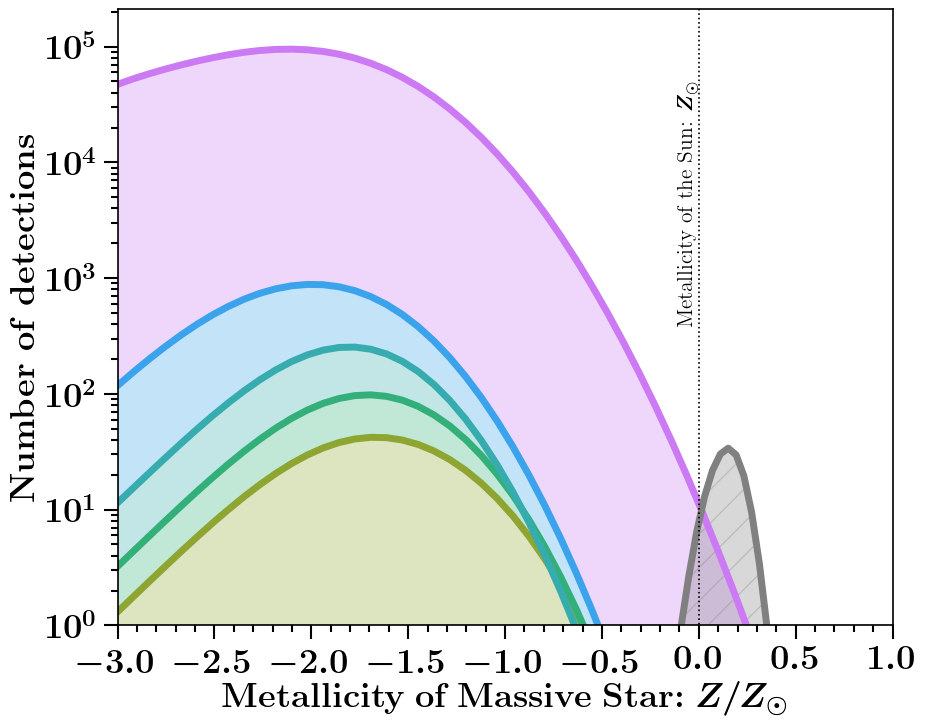

In [82]:

# metallicitySystems = metallicitySystems
Zsun = 0.142
ylim_low = 1
# wz0 = weights_z0_2

labels = ['O3', 'O4', 'O5', "Asharp", 'next gen']
multiplication_factor = np.asarray([0.9, 2, 5, 20, 3000])*50
colors_z = [colors[4], colors[6], colors[8], colors[10], colors[12]]

f, ax= plt.subplots(1, 1,  figsize=(10,8))   

xx_Z = np.linspace(-3,1, 50)
yy_l = np.ones_like(xx_Z)*ylim_low


# for ind, z_ind in enumerate([0, 2]):
for ind, z_ind in enumerate([0, 2, 5, 10, 20]):
    metallicitySystems, weights = obtain_metallicities_weights(max_z_ind=z_ind)
    log10ZZsun = np.log10(metallicitySystems/Zsun)
    
    
    #kde 
    kde = gaussian_kde(dataset=log10ZZsun, weights=weights, bw_method=0.8)
    y_kde_LVK = kde(xx_Z)
    
    ax.plot(xx_Z, y_kde_LVK*multiplication_factor[ind], lw=5, label=labels[ind], c=colors_z[ind])
    ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_LVK*multiplication_factor[ind],  color=colors_z[ind], alpha=0.3)
    yy_l = y_kde_LVK*multiplication_factor[ind]


### PLOT THE MW 
mu_Z = Zsun*1.4
sigma_Z = 0.2*Zsun
mw_z = np.random.normal(mu_Z, sigma_Z, 1000)
mw_z = np.log10(mw_z/Zsun)

xx_Z = np.linspace(-3,1, 100)
kde = gaussian_kde(dataset=mw_z, bw_method=0.8)
y_kde_mw = kde(xx_Z)
yy_l = np.ones_like(xx_Z)*ylim_low
# plt.plot(xx_Z, y_kde_mw)
mw_factor = 7
ax.plot(xx_Z, y_kde_mw*mw_factor, lw=5, label='milky way', c='gray')
ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_mw*mw_factor,  color='gray', alpha=0.3, hatch='/')


### plot guidelines for Z

metallicity_vlines_values_list = [np.log10(solar/solar)] #, np.log10(0.5*solar/solar),np.log10(0.2*solar/solar), np.log10(0.1*solar/solar)]#, np.log10(0.0105)]
metallicity_vlines_text_list = [r'Metallicity of the Sun: $Z_{\odot}$'] #, r'$Z_{\odot}/2$', r'$Z_{\odot}/5$',  r'$Z_{\odot}/10$'] #, r'$Z=0.0105$']  
Ylim = 2.1*1E5
# plot extra vertical line to indicate metallicities   
for zz_ind, zz in enumerate(metallicity_vlines_values_list) :
    ax.plot([zz,zz], [0,Ylim+1], c='k',lw=1.2, alpha=1, linestyle=':', zorder=100)   
#     ax.text(zz-0.11, ylim_low+0.02, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='bottom')   
    ax.text(zz-0.11, 5*1E4, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   


# ##### SECOND AXIS ######
# # add Age of The Universe on Top 
# if ind_t==0:
#     physicalnames=[]
#     for ind_m, bps_model in enumerate(BPSnameslist):
#         physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
#     ax2y = axe.twiny()
#     ax2y.set_xlim(xmin, xmax)
#     ax2y.set_xticks(range(nModels))
#     ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    



# ax.plot(xx_Z, y_kde_LVK*50, lw=3)
# ax.hist(log10ZZsun, bins=100, weights=weights_z0_2)

xlabel = r'$\textbf{Metallicity} \ \textbf{of} \ \textbf{Massive} \ \textbf{Star:} \ Z/Z_{\odot} $'
ylabel = r'$\textbf{Number of detections}$' #' \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
# plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')

ax = layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel)
ax.set_xlim(-3, 1)
ax.set_yscale('log')
ax.set_ylim(ylim_low,Ylim)

plt.savefig('./MetallicityStars.png', dpi=600, transparent=False)
plt.savefig('./MetallicityStars.pdf', transparent=False) 

plt.show()





we will take systems up to redshift z =  0.19230769230769232


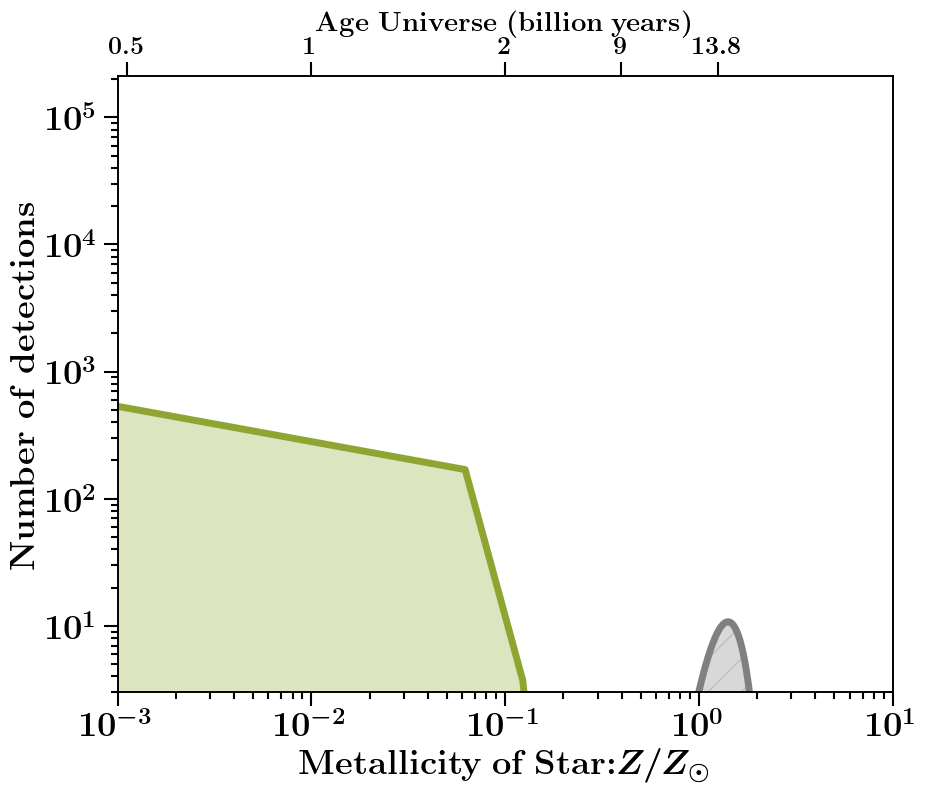

In [80]:

# metallicitySystems = metallicitySystems
Zsun = 0.142
ylim_low = 1
# wz0 = weights_z0_2

labels = ['O3', 'O4', 'O5', "Asharp", 'next gen']
multiplication_factor = np.asarray([0.9, 2, 5, 20, 3000])*50
colors_z = [colors[4], colors[6], colors[8], colors[10], colors[12]]

f, ax= plt.subplots(1, 1,  figsize=(10,8))   

xx_Z = np.linspace(10**-3,3, 50)
yy_l = np.ones_like(xx_Z)*ylim_low


# for ind, z_ind in enumerate([0, 2]):
for ind, z_ind in enumerate([0]):
    metallicitySystems, weights = obtain_metallicities_weights(max_z_ind=z_ind)
    log10ZZsun = (metallicitySystems/Zsun)
    
    
    #kde 
    kde = gaussian_kde(dataset=log10ZZsun, weights=weights, bw_method=0.8)
    y_kde_LVK = kde(xx_Z)
    
    ax.plot(xx_Z, y_kde_LVK*multiplication_factor[ind], lw=5, label=labels[ind], c=colors_z[ind])
    ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_LVK*multiplication_factor[ind],  color=colors_z[ind], alpha=0.3)
    yy_l = y_kde_LVK*multiplication_factor[ind]


### PLOT THE MW 
mu_Z = Zsun*1.4
sigma_Z = 0.2*Zsun
mw_z = np.random.normal(mu_Z, sigma_Z, 1000)
mw_z = (mw_z/Zsun)

xx_Z = np.linspace(10**-3,3, 100)
kde = gaussian_kde(dataset=mw_z, bw_method=0.8)
y_kde_mw = kde(xx_Z)
yy_l = np.ones_like(xx_Z)*ylim_low
# plt.plot(xx_Z, y_kde_mw)
mw_factor = 7
ax.plot(xx_Z, y_kde_mw*mw_factor, lw=5, label='milky way', c='gray')
ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_mw*mw_factor,  color='gray', alpha=0.3, hatch='/')


### plot guidelines for Z

# metallicity_vlines_values_list = [np.log10(solar/solar), np.log10(0.5*solar/solar),np.log10(0.2*solar/solar), np.log10(0.1*solar/solar)]#, np.log10(0.0105)]
# metallicity_vlines_text_list = [r'solar metallicity $Z_{\odot}$', r'$Z_{\odot}/2$', r'$Z_{\odot}/5$',  r'$Z_{\odot}/10$'] #, r'$Z=0.0105$']  
# Ylim = 2.1*1E5
# # plot extra vertical line to indicate metallicities   
# for zz_ind, zz in enumerate(metallicity_vlines_values_list) :
#     ax.plot([zz,zz], [0,Ylim+1], c='k',lw=1.2, alpha=1, linestyle=':', zorder=100)   
# #     ax.text(zz-0.11, ylim_low+0.02, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='bottom')   
#     ax.text(zz-0.11, Ylim-0.022, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   


#### SECOND AXIS ######
# add Age of The Universe on Top 
# if ind_t==0:
physicalnames=[]
ax2y = ax.twiny()
ax2y.set_xlim(-3, 1)
ax2y.set_xticks([-2.95, -2.,              -1, -0.4,  0.1])
ax2y.set_xticklabels([r'$\textbf{0.5}$', r'$1$', r'$2$',           r'$9$',  r'$13.8$'], fontsize=fs-6, rotation=0)#, orientation=30)    
layoutAxes(ax2y, nameX=r'$\textbf{Age Universe} \ (\rm{billion } \ \textbf{years})$', fontsize = fs-4, nameY=None, setMinor=False)


# ax.plot(xx_Z, y_kde_LVK*50, lw=3)
# ax.hist(log10ZZsun, bins=100, weights=weights_z0_2)

xlabel = r'$\textbf{Metallicity} \ \textbf{of} \  \textbf{Star:}  Z/Z_{\odot} $'
ylabel = r'$\textbf{Number of detections}$' #' \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
# plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')

ax = layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel)
ax.set_xscale('log')
ax.set_xlim(10**-3, 10)
ax.set_yscale('log')
ax.set_ylim(ylim_low+2,Ylim)



# plt.savefig('./MetallicityStars.png', dpi=600, transparent=False)
# plt.savefig('./MetallicityStars.pdf', transparent=False) 

plt.show()





## only the Milky Way stars 

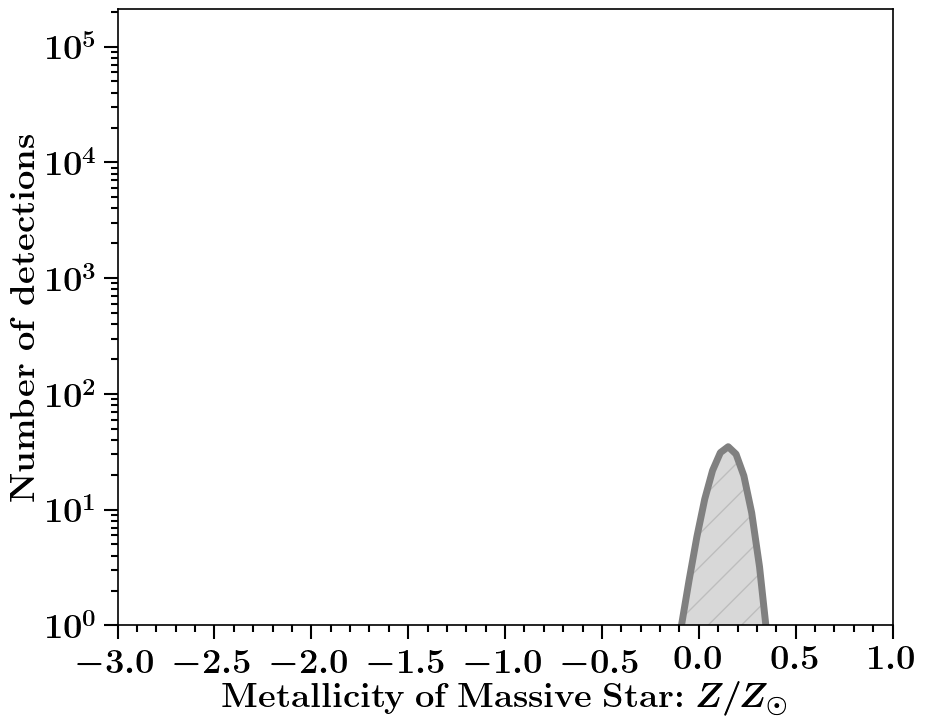

In [88]:

# metallicitySystems = metallicitySystems
Zsun = 0.142
ylim_low = 1
# wz0 = weights_z0_2

labels = ['O3', 'O4', 'O5', "Asharp", 'next gen']
multiplication_factor = np.asarray([0.9, 2, 5, 20, 3000])*50
colors_z = [colors[4], colors[6], colors[8], colors[10], colors[12]]

f, ax= plt.subplots(1, 1,  figsize=(10,8))   

xx_Z = np.linspace(-3,1, 50)
yy_l = np.ones_like(xx_Z)*ylim_low


# for ind, z_ind in enumerate([0, 2]):
# for ind, z_ind in enumerate([0, 2, 5, 10, 20]):
#     metallicitySystems, weights = obtain_metallicities_weights(max_z_ind=z_ind)
#     log10ZZsun = np.log10(metallicitySystems/Zsun)
    
    
#     #kde 
#     kde = gaussian_kde(dataset=log10ZZsun, weights=weights, bw_method=0.8)
#     y_kde_LVK = kde(xx_Z)
    
#     ax.plot(xx_Z, y_kde_LVK*multiplication_factor[ind], lw=5, label=labels[ind], c=colors_z[ind])
#     ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_LVK*multiplication_factor[ind],  color=colors_z[ind], alpha=0.3)
#     yy_l = y_kde_LVK*multiplication_factor[ind]


### PLOT THE MW 
mu_Z = Zsun*1.4
sigma_Z = 0.2*Zsun
mw_z = np.random.normal(mu_Z, sigma_Z, 1000)
mw_z = np.log10(mw_z/Zsun)

xx_Z = np.linspace(-3,1, 100)
kde = gaussian_kde(dataset=mw_z, bw_method=0.8)
y_kde_mw = kde(xx_Z)
yy_l = np.ones_like(xx_Z)*ylim_low
# plt.plot(xx_Z, y_kde_mw)
mw_factor = 7
ax.plot(xx_Z, y_kde_mw*mw_factor, lw=5, label='milky way', c='gray')
ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_mw*mw_factor,  color='gray', alpha=0.3, hatch='/')



# metallicity_vlines_values_list = [np.log10(solar/solar)] #, np.log10(0.5*solar/solar),np.log10(0.2*solar/solar), np.log10(0.1*solar/solar)]#, np.log10(0.0105)]
# metallicity_vlines_text_list = [r'Metallicity of the Sun: $Z_{\odot}$'] #, r'$Z_{\odot}/2$', r'$Z_{\odot}/5$',  r'$Z_{\odot}/10$'] #, r'$Z=0.0105$']  
# Ylim = 2.1*1E5
# # plot extra vertical line to indicate metallicities   
# for zz_ind, zz in enumerate(metallicity_vlines_values_list) :
#     ax.plot([zz,zz], [0,Ylim+1], c='k',lw=1.2, alpha=1, linestyle=':', zorder=100)   
# #     ax.text(zz-0.11, ylim_low+0.02, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='bottom')   
#     ax.text(zz-0.11, 5*1E4, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   



# ax.plot(xx_Z, y_kde_LVK*50, lw=3)
# ax.hist(log10ZZsun, bins=100, weights=weights_z0_2)


xlabel = r'$\textbf{Metallicity} \ \textbf{of} \ \textbf{Massive} \ \textbf{Star:} \ Z/Z_{\odot} $'
ylabel = r'$\textbf{Number of detections}$' #' \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
# plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')

ax = layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel)
ax.set_xlim(-3, 1)
ax.set_yscale('log')
ax.set_ylim(ylim_low,Ylim)

plt.savefig('./MetallicityStarsMW.png', dpi=600, transparent=False)
plt.savefig('./MetallicityStarsMW.pdf', transparent=False) 

plt.show()





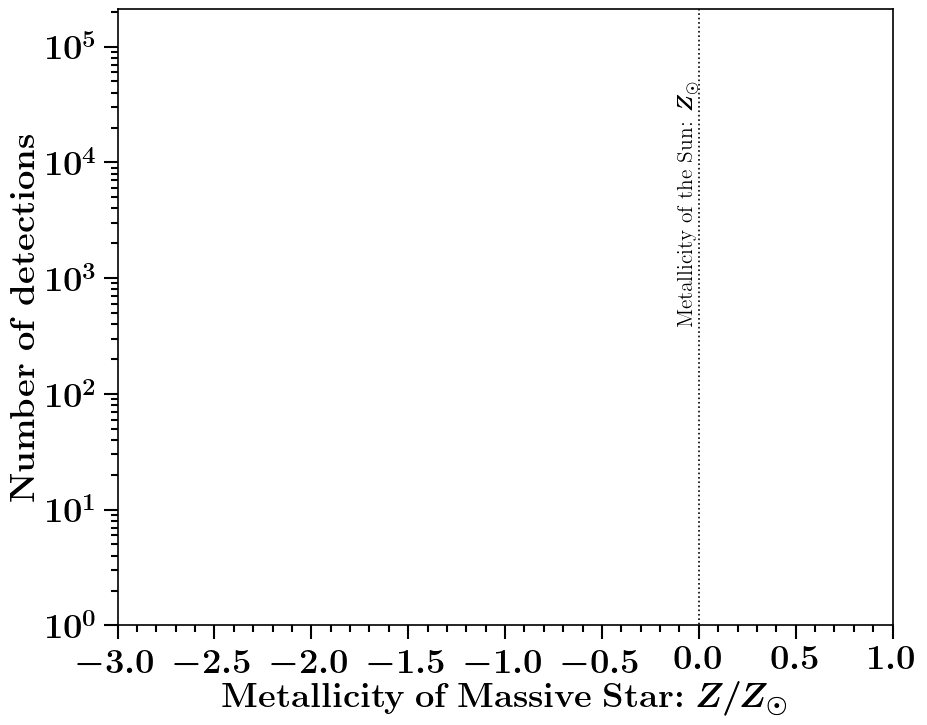

In [87]:

# metallicitySystems = metallicitySystems
Zsun = 0.142
ylim_low = 1
# wz0 = weights_z0_2

labels = ['O3', 'O4', 'O5', "Asharp", 'next gen']
multiplication_factor = np.asarray([0.9, 2, 5, 20, 3000])*50
colors_z = [colors[4], colors[6], colors[8], colors[10], colors[12]]

f, ax= plt.subplots(1, 1,  figsize=(10,8))   

xx_Z = np.linspace(-3,1, 50)
yy_l = np.ones_like(xx_Z)*ylim_low


# for ind, z_ind in enumerate([0, 2]):
# for ind, z_ind in enumerate([0, 2, 5, 10, 20]):
#     metallicitySystems, weights = obtain_metallicities_weights(max_z_ind=z_ind)
#     log10ZZsun = np.log10(metallicitySystems/Zsun)
    
    
#     #kde 
#     kde = gaussian_kde(dataset=log10ZZsun, weights=weights, bw_method=0.8)
#     y_kde_LVK = kde(xx_Z)
    
#     ax.plot(xx_Z, y_kde_LVK*multiplication_factor[ind], lw=5, label=labels[ind], c=colors_z[ind])
#     ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_LVK*multiplication_factor[ind],  color=colors_z[ind], alpha=0.3)
#     yy_l = y_kde_LVK*multiplication_factor[ind]


### PLOT THE MW 
mu_Z = Zsun*1.4
sigma_Z = 0.2*Zsun
mw_z = np.random.normal(mu_Z, sigma_Z, 1000)
mw_z = np.log10(mw_z/Zsun)

xx_Z = np.linspace(-3,1, 100)
kde = gaussian_kde(dataset=mw_z, bw_method=0.8)
y_kde_mw = kde(xx_Z)
yy_l = np.ones_like(xx_Z)*ylim_low
# plt.plot(xx_Z, y_kde_mw)
mw_factor = 7
# ax.plot(xx_Z, y_kde_mw*mw_factor, lw=5, label='milky way', c='gray')
# ax.fill_between(xx_Z, y1=yy_l, y2=y_kde_mw*mw_factor,  color='gray', alpha=0.3, hatch='/')



metallicity_vlines_values_list = [np.log10(solar/solar)] #, np.log10(0.5*solar/solar),np.log10(0.2*solar/solar), np.log10(0.1*solar/solar)]#, np.log10(0.0105)]
metallicity_vlines_text_list = [r'Metallicity of the Sun: $Z_{\odot}$'] #, r'$Z_{\odot}/2$', r'$Z_{\odot}/5$',  r'$Z_{\odot}/10$'] #, r'$Z=0.0105$']  
Ylim = 2.1*1E5
# plot extra vertical line to indicate metallicities   
for zz_ind, zz in enumerate(metallicity_vlines_values_list) :
    ax.plot([zz,zz], [0,Ylim+1], c='k',lw=1.2, alpha=1, linestyle=':', zorder=100)   
#     ax.text(zz-0.11, ylim_low+0.02, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='bottom')   
    ax.text(zz-0.11, 5*1E4, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   



# ax.plot(xx_Z, y_kde_LVK*50, lw=3)
# ax.hist(log10ZZsun, bins=100, weights=weights_z0_2)


xlabel = r'$\textbf{Metallicity} \ \textbf{of} \ \textbf{Massive} \ \textbf{Star:} \ Z/Z_{\odot} $'
ylabel = r'$\textbf{Number of detections}$' #' \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
# plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')

ax = layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel)
ax.set_xlim(-3, 1)
ax.set_yscale('log')
ax.set_ylim(ylim_low,Ylim)

plt.savefig('./MetallicityStarsMW0.png', dpi=600, transparent=False)
plt.savefig('./MetallicityStarsMW0.pdf', transparent=False) 

plt.show()





In [ ]:
print(zserf)

### For example, to get the compact object masses of all simulated BH-NS systems you do: 


In [8]:
fdata.close()

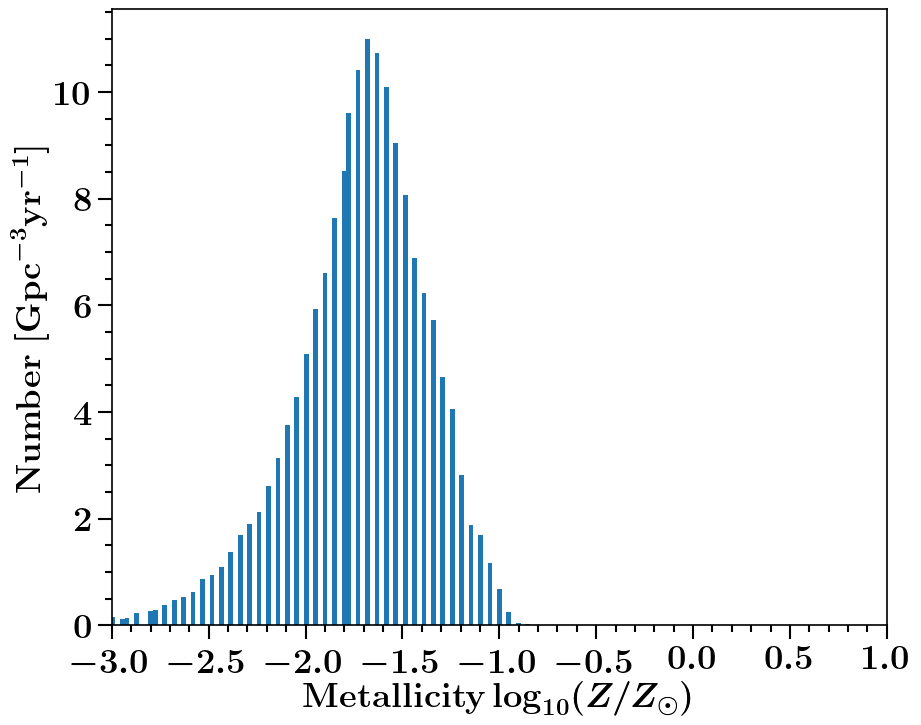

this mostly just shows my metallicity bins and where BHNS are originating from


In [9]:
f, ax= plt.subplots(1, 1,  figsize=(10,8))   


# metallicitySystems = metallicitySystems
Zsun = 0.142
log10ZZsun = np.log10(metallicitySystems/Zsun)

ax.hist(log10ZZsun, bins=100, weights=weights_z0_2)
xlabel = r'$\textbf{Metallicity} \log_{10}(Z/Z_{\odot})$'
ylabel = r'$\textbf{Number} \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
# plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')

ax = layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel)
ax.set_xlim(-3, 1)
plt.show()




print('this mostly just shows my metallicity bins and where BHNS are originating from')

In [10]:
# metallicitySystems = metallicitySystems
Zsun = 0.142
log10ZZsun = np.log10(metallicitySystems/Zsun)
wz0 = weights_z0_2
xx_Z = np.linspace(-3,1, 200)

kde = gaussian_kde(dataset=log10ZZsun, weights=wz0)
y_kde_LVK = kde(xx_Z)



f, ax= plt.subplots(1, 1,  figsize=(10,8))   





ax.plot(xx_Z, y_kde_LVK*50, lw=3)
# ax.hist(log10ZZsun, bins=100, weights=weights_z0_2)

xlabel = r'$\textbf{Metallicity} \log_{10}(Z/Z_{\odot})$'
ylabel = r'$\textbf{Number}$' #' \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
# plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')

ax = layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel)
ax.set_xlim(-3, 1)
plt.show()







KeyboardInterrupt: 

In [ ]:
xx_Z = np.logspace(-3,1, 200)
# print(xx_Z)

In [ ]:
# metallicitySystems = metallicitySystems
Zsun = 0.142
ZZsun = (metallicitySystems/Zsun)
wz0 = weights_z0_2
# xx_Z = np.logspace(10**-3,10**1, 200)
xx_Z = np.logspace(-3,1, 200)

kde = gaussian_kde(dataset=ZZsun, weights=wz0)
y_kde_LVK = kde(xx_Z)



f, ax= plt.subplots(1, 1,  figsize=(10,8))   



ax.plot(xx_Z, y_kde_LVK*50, lw=3)
# ax.hist(log10ZZsun, bins=100, weights=weights_z0_2)

xlabel = r'$\textbf{Metallicity} (Z/Z_{\odot})$'
ylabel = r'$\textbf{Number}$' #' \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
# plt.title('weighted rate for astrophysical BH-NS merger populatio at redshift 0')

ax = layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel)
ax.set_xscale('log')
# ax.set_xlim(-3, 1)
plt.show()







In [ ]:
print(metallicitySystems_0_2) 
print(weights_0_2)